In [9]:
from __future__ import division, print_function

# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.core import Element, Composition

%matplotlib inline

In [4]:
import csv

with open("../../ICSD/icsd-ternaries.csv", "r") as f:
    csv_reader = csv.reader(f, dialect = csv.excel_tab)
    data = [line for line in csv_reader]

formulas = [line[2] for line in data]
compositions = [Composition(f) for f in formulas]

## Structure Types

Structure types are assigned by hand by ICSD curators.

In [5]:
# How many ternaries have been assigned a structure type?
structure_types = [line[3] for line in data if line[3] is not '']
unique_structure_types = set(structure_types)
print("There are {} ICSD ternaries entries.".format(len(data)))
print("Structure types are assigned for {} entries.".format(len(structure_types)))
print("There are {} unique structure types.".format(len(unique_structure_types)))

There are 68064 ICSD ternaries entries.
Structure types are assigned for 59117 entries.
There are 4201 unique structure types.


Filter for stoichiometric compounds only:

In [6]:
def is_stoichiometric(composition):
    return np.all(np.mod(composition.values(), 1) == 0)

In [7]:
stoichiometric_compositions = [c for c in compositions if is_stoichiometric(c)]
print("Number of stoichiometric compositions: {}".format(len(stoichiometric_compositions)))
ternaries = set(c.formula for c in stoichiometric_compositions)
print("Number of unique stoichiometric compositions: {}".format(len(ternaries)))

Number of stoichiometric compositions: 49893
Number of unique stoichiometric compositions: 26255


In [10]:
data_stoichiometric = [x for x in data if is_stoichiometric(Composition(x[2]))]

In [11]:
from collections import Counter

struct_type_freq = Counter(x[3] for x in data_stoichiometric if x[3] is not '')

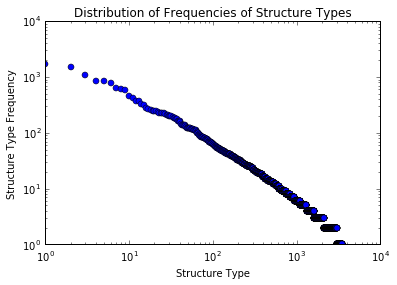

In [15]:
plt.loglog(range(1, len(struct_type_freq)+1),
             sorted(struct_type_freq.values(), reverse = True), 'o')
plt.xlabel("Structure Type")
plt.ylabel("Structure Type Frequency")
plt.title("Distribution of Frequencies of Structure Types")

In [55]:
sorted(struct_type_freq.items(), key = lambda x: x[1], reverse = True)

[('ThCr2Si2', 1740),
 ('Spinel-Al2MgO4', 1529),
 ('Perovskite-GdFeO3', 1079),
 ('TiNiSi-MgSrSi', 861),
 ('Perovskite-CaTiO3', 852),
 ('ZrNiAl-Fe2P', 792),
 ('Heusler-AlCu2Mn', 627),
 ('Mn12Th', 601),
 ('PbClF/Cu2Sb', 581),
 ('Delafossite-NaCrS2', 455),
 ('NaCl', 427),
 ('Chalcopyrite-CuFeS2', 373),
 ('Pyrochlore-NaCa(Nb2O6)F', 369),
 ('Laves(2H)-MgZn2', 327),
 ('Heusler(alloy)-AlLiSi', 322),
 ('Zircon-ZrSiO4', 274),
 ('BaCuSn2-CeNi(1-x)Si2', 265),
 ('CaCu5', 254),
 ('Laves(cub)-Cu2Mg', 251),
 ('CaFe2O4', 250),
 ('Fe14Nd2B', 244),
 ('Calcite-CaCO3(hR10)', 237),
 ('K4Si23', 231),
 ('Si2U3', 230),
 ('La2O3', 229),
 ('Th3P4', 228),
 ('ZrBeSi', 222),
 ('Be2CaGe2', 212),
 ('Scheelite-CaWO4', 211),
 ('Perovskite-NdAlO3', 203),
 ('Olivine-Mg2SiO4', 203),
 ('K2PtCl6', 201),
 ('AuBe5', 196),
 ('Mn23Th6', 188),
 ('Brucite-Mg(OH)2', 184),
 ('Pr3Rh4Sn13', 178),
 ('K2MgF4', 177),
 ('LiNbO3', 164),
 ('Fe6Ge6Mg', 160),
 ('Th2Zn17', 160),
 ('Mo6PbS8', 156),
 ('LiGaGe', 144),
 ('Th2Zn17-filled', 139),
 

In [16]:
uniq_phases = set()
for row in data_stoichiometric:
    spacegroup, formula, struct_type = row[1:4]
    phase = (spacegroup, Composition(formula).formula, struct_type)
    uniq_phases.add(phase)

In [18]:
uniq_struct_type_freq = Counter(x[2] for x in uniq_phases if x[2] is not '')
uniq_struct_type_freq_sorted = sorted(uniq_struct_type_freq.items(), key = lambda x: x[1], reverse = True)

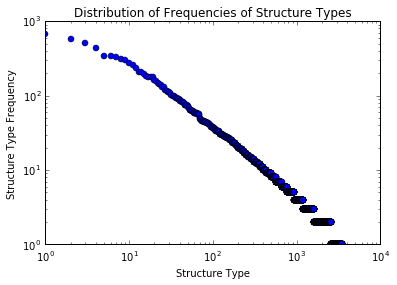

In [20]:
plt.loglog(range(1, len(uniq_struct_type_freq_sorted)+1),
           [x[1] for x in uniq_struct_type_freq_sorted], 'o')
plt.xlabel("Structure Type")
plt.ylabel("Structure Type Frequency")
plt.title("Distribution of Frequencies of Structure Types")

In [21]:
uniq_struct_type_freq_sorted

[('ThCr2Si2', 676),
 ('TiNiSi-MgSrSi', 586),
 ('ZrNiAl-Fe2P', 511),
 ('Perovskite-CaTiO3', 439),
 ('Heusler-AlCu2Mn', 343),
 ('Mn12Th', 339),
 ('PbClF/Cu2Sb', 334),
 ('Perovskite-GdFeO3', 314),
 ('Spinel-Al2MgO4', 305),
 ('Delafossite-NaCrS2', 278),
 ('NaCl', 258),
 ('Laves(2H)-MgZn2', 239),
 ('Laves(cub)-Cu2Mg', 209),
 ('Th3P4', 205),
 ('Si2U3', 194),
 ('Heusler(alloy)-AlLiSi', 185),
 ('BaCuSn2-CeNi(1-x)Si2', 179),
 ('ZrBeSi', 179),
 ('CaCu5', 178),
 ('Be2CaGe2', 163),
 ('CaFe2O4', 158),
 ('Pyrochlore-NaCa(Nb2O6)F', 146),
 ('Mn23Th6', 142),
 ('La2O3', 140),
 ('Ga4Ti5', 131),
 ('Th2Zn17', 130),
 ('K2PtCl6', 121),
 ('AuBe5', 114),
 ('Pr3Rh4Sn13', 113),
 ('CuHg2Ti', 112),
 ('LiGaGe', 108),
 ('Zircon-ZrSiO4', 101),
 ('U3S5', 100),
 ('FeSmB4-CrYB4', 99),
 ('ZrCuSiAs-CuHfSi2', 95),
 ('Carbide(eta)-Fe3W3C', 94),
 ('CeCu2', 93),
 ('BaNiSn3', 90),
 ('Carbide(tau)-Cr23C6', 89),
 ('Scheelite-CaWO4', 87),
 ('CrNb2Se4-Cr3S4', 85),
 ('Zr2Fe12P7', 84),
 ('Ni17Th2', 83),
 ('Al2CuMg', 82),
 ('K2MgF4',

In [22]:
for struct_type,freq in uniq_struct_type_freq_sorted[:10]:
    print("{} : {}".format(struct_type, freq))
    fffs = [p[1] for p in uniq_phases if p[2] == struct_type]
    fmt = "  ".join(["{:14}"]*5)
    print(fmt.format(*fffs[0:5]))
    print(fmt.format(*fffs[5:10]))
    print(fmt.format(*fffs[10:15]))
    print(fmt.format(*fffs[15:20]))

ThCr2Si2 : 676
Sm1 Ni2 Sb2     Yb1 Si2 Ag2     Pr1 Fe2 Si2     Np1 Si2 Au2     Tb1 Co2 B2    
Ce1 Al3 Cu1     Nd1 P2 Pd2      Yb1 Co2 Ge2     Np1 Ni2 Ge2     U1 Si2 Ir2    
Gd1 Ni2 Sb2     Ho1 Si2 Pt2     Sm1 Fe2 Si2     Dy1 Mn2 Ge2     Er1 Mn2 Si2   
Pr1 Co2 B2      La1 Mn2 Ge2     Ba1 Ag2 Ge2     Ba1 Al2 Si2     Sm1 Fe2 Ge2   
TiNiSi-MgSrSi : 586
Ti1 As1 Rh1     Gd1 Zn1 Rh1     Pr1 Ge1 Rh1     Hf1 Si1 Rh1     Er1 Ga1 Pd1   
Gd1 Ge1 Rh1     Nb1 Fe1 Si1     Yb1 Ni1 Sn1     Sr1 Li1 Bi1     Yb1 Mg1 Pd1   
Ti1 Co1 P1      U1 Co1 Ge1      Gd1 Ge1 Ir1     Tm1 Ga1 Pt1     Tb1 Ni1 Ge1   
Y1 Si1 Pt1      Ti1 Si1 Ru1     Ho1 Ge1 Ru1     Sm1 Ge1 Pt1     Co1 Mo1 P1    
ZrNiAl-Fe2P : 511
Gd1 Zn1 Pd1     Dy1 Mg1 Pd1     Cr1 Ni1 P1      Ho6 Mn1 Te2     Gd1 Pd1 Pb1   
U1 Al1 Rh1      Sm1 Cd1 Cu1     Nb1 Fe1 B1      Ce1 Cd1 Pt1     Pu1 Al1 Ni1   
Dy1 Sn1 Pt1     Ho1 Al1 Cu1     Na1 Sr1 P1      La1 Mg1 Tl1     Th1 Al1 Pd1   
Ho1 Mg1 In1     Gd1 In1 Rh1     Yb1 Cd1 Ge1     Zr1 Ga1 Pt1     Tm1 Ag1 Sn1   

## Long Formulas

In [6]:
# What are the longest formulas?
for formula in sorted(formulas, key = lambda x: len(x), reverse = True)[:20]:
    print(formula)

((Si (C H3)2)2 (Si (Si (C H3)3)2) (Si (C H3) (Si (C H3)3)) (Si (C H3) (Si (C H3)2 (Si (Si (C H3)3)3))))
((Si (C H3)2)2 (Si (Si (C H3)3)2) (Si (C H3) (Si (C H3)3)) (Si (C H3) (Si (Si (C H3)3)3)))
(((C H3) ((C H3)3 Si)2 Si (C H3)2 Si)2 Si (C H3) Si (C H3)2 Si (Si (C H3)3)2 Si (C H3)2)2
((((C H3)3 Si)3 Si (C H3)2 Si)2 Si (C H3) Si (C H3)2 Si (Si (C H3)3)2 Si (C H3)2)2
((Si (C H3)2)2 (Si (Si (C H3)3)2)2 (Si (C H3) (Si (C H3)2 (Si (Si (C H3)3)3))))
((Si (C H3)2)3 (Si (Si (C H3)3)2) (Si (C H3) (Si (C H3)2 (Si (Si (C H3)3)3))))
((Si (C H3)2)3 (Si (Si (C H3)3)2) (Si (C H3) (Si (Si (C H3)3)3)))
((Si (C H3)2)2 (Si (Si (C H3)3)2)2 (Si (C H3) (Si (C H3)3)))
((Si (C H3)2)4 (Si (C H3) (Si (C H3)3)) (Si (Si (C H3)3)2))
Ba8 (Si2.63 Al3.28) (Si11.3 Al4.32) (Si16.9 Al6.48)
(Mo138 O410 (O H)20 (H2 O)46) (H3 O)40 (H2 O)108
(Mo138 O410 (O H)20 (H2 O)38) (H3 O)40 (H2 O)78
(Mo138 O406 (O H)16 (H2 O)46) (H3 O)28 (H2 O)88
(Mo142 O400 (O H)52 (H2 O)38) (H3 O)28 (H2 O)34
(Mo148 O436 (O H)15 (H2 O)58) (H3 O)27 (H

Two key insights:
1. Just because there are three elements in the formula
   doesn't mean the compound is fundamentally a ternary.
   There are doped binaries which masquerade as ternaries.
   And there are doped ternaries which masquerade as quaternaries,
   or even quintenaries. Because I only asked for compositions
   with 3 elements, this data is missing.
2. ICSD has strategically placed parentheses in the formulas
   which give hints as to logical groupings. For example:
     (Ho1.3 Ti0.7) ((Ti0.64 Ho1.36) O6.67)
   is in fact in the pyrochlore family, A2B2O7.

## Intermetallics

How many intermetallics does the ICSD database contain?

In [8]:
def filter_in_set(compound, universe):
    return all((e in universe) for e in Composition(compound))

transition_metals = [e for e in Element if e.is_transition_metal]
tm_ternaries = [c for c in formulas if filter_in_set(c, transition_metals)]
print("Number of intermetallics:", len(tm_ternaries))

Number of intermetallics: 1021


In [15]:
unique_tm_ternaries = set([Composition(c).formula for c in tm_ternaries])
print("Number of unique intermetallics:", len(unique_tm_ternaries))

Number of unique intermetallics: 848


In [16]:
unique_tm_ternaries

{u'Ag0.25 Pd0.5 Au0.25',
 u'Cd0.99 Ag0.09 Au0.91',
 u'Cd2 Ag1 Au1',
 u'Co0.05 Pd0.9 Rh0.05',
 u'Co0.5 Ni0.5 Pt1',
 u'Co1 Ni1 Pt2',
 u'Cr0.176 Co0.442 Mo0.382',
 u'Cr0.2 Fe0.6 Mo0.2',
 u'Cr0.2 Ni0.72 W0.08',
 u'Cr0.21 Fe0.62 Mo0.17',
 u'Cr0.26 Fe0.62 Co0.12',
 u'Cr0.4 Fe0.475 W0.125',
 u'Cr0.4 Mo0.32 W0.28',
 u'Cr0.8 Fe3 Re1.2',
 u'Cr0.8 Ni0.8 Mo0.4',
 u'Cr0.84 Co0.28 Re0.84',
 u'Cr0.86 Co0.286 Re0.853',
 u'Cr1 Co1 Pt2',
 u'Cr1.14 Ni0.71 W0.14',
 u'Cr1.67 Fe3.1 Mo0.23',
 u'Cr15.01 Co22.99 W15',
 u'Cr2.6 Co7.8 W2.6',
 u'Cr6 Fe18 Mo5',
 u'Cr9.54 Ni21.22 Mo25.24',
 u'Cr9.61 Ni21.27 Mo25.12',
 u'Cu0.33 Ni0.34 Au0.33',
 u'Cu0.333 Ni0.333 Pd0.333',
 u'Cu0.453 Pt0.047 Au0.5',
 u'Cu0.75 Pd0.25 Au1',
 u'Cu0.76 Pd0.24 Au1',
 u'Cu0.84 Ni0.14 Au0.98',
 u'Cu0.86 Ni0.14 Au1',
 u'Cu0.94 Pt0.06 Au1',
 u'Cu0.95 Pt0.05 Au1',
 u'Cu1 Ag0.05 Au0.95',
 u'Cu1 Ag0.08 Au0.92',
 u'Cu1 Ni0.1 Au0.9',
 u'Cu1 Ni0.14 Au0.86',
 u'Cu1.33 Ni1.33 Pd1.33',
 u'Fe0.01 Cu0.49 Au0.5',
 u'Fe0.129 Co0.853 Au0.018',
 u'Fe0.15 Ni